# Machine Learning -LinearRegression

In [1285]:
from sklearn import preprocessing, metrics
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [1286]:
data=pd.read_csv('step 4-Cleaning Data records.csv')
data=data.drop(columns=["Unnamed: 0"])


In [1287]:
data

,Rank,Mark,Wind,Competitor,Gender,Age,Country,Position,Venue,Date,Result Score,Age of competition,mps,kmh,Age range,pos,m/s
0,1,9.58,0.9,Usain BOLT,1,35.0,JAM,1.0,"Olympiastadion, Berlin (GER)",16-08-2009,1356,23.0,10.438413,37.578288,30-45,1-3,10-10.5
1,4,9.69,-0.1,Yohan BLAKE,1,32.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",23-08-2012,1316,23.0,10.319917,37.151703,30-45,1-3,10-10.5
2,1,10.49,0.0,Florence GRIFFITH-JOYNER,2,62.0,USA,1.0,"Indianapolis, IN (USA)",16-07-1988,1314,29.0,9.532888,34.318398,46+,1-3,9.5-10
3,10,9.72,0.2,Asafa POWELL,1,39.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",02-09-2008,1305,26.0,10.288066,37.037037,30-45,1-3,10-10.5
4,13,9.74,0.9,Justin GATLIN,1,39.0,USA,1.0,"Suhaim bin Hamad Stadium, Doha (QAT)",15-05-2015,1298,33.0,10.266940,36.960986,30-45,1-3,10-10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,25198,11.47,7.0,Katy WYPER,2,28.0,GBR,3.0,Manchester (GBR),28-07-2018,1057,25.0,8.718396,31.386225,18-29,1-3,8.5-9
5013,27363,11.49,6.6,De'Stini HENDERSON,2,25.0,USA,1.0,"Austin, TX (USA)",29-04-2017,1056,21.0,8.703220,31.331593,18-29,1-3,8.5-9
5014,28468,11.50,6.6,Kandice BELL,2,38.0,USA,5.0,"Fort Worth, TX (USA)",21-04-2007,1054,24.0,8.695652,31.304348,30-45,4-5,8.5-9
5015,27363,11.49,7.1,Jeanette PETTIGREW,2,32.0,USA,1.0,"Dekalb, IL (USA)",14-05-2011,1053,22.0,8.703220,31.331593,30-45,1-3,8.5-9


Confession drop duplicates competitor

In [1290]:
data=data.drop_duplicates(subset=['Competitor'])


In [1291]:
data

,Rank,Mark,Wind,Competitor,Gender,Age,Country,Position,Venue,Date,Result Score,Age of competition,mps,kmh,Age range,pos,m/s
0,1,9.58,0.9,Usain BOLT,1,35.0,JAM,1.0,"Olympiastadion, Berlin (GER)",16-08-2009,1356,23.0,10.438413,37.578288,30-45,1-3,10-10.5
1,4,9.69,-0.1,Yohan BLAKE,1,32.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",23-08-2012,1316,23.0,10.319917,37.151703,30-45,1-3,10-10.5
2,1,10.49,0.0,Florence GRIFFITH-JOYNER,2,62.0,USA,1.0,"Indianapolis, IN (USA)",16-07-1988,1314,29.0,9.532888,34.318398,46+,1-3,9.5-10
3,10,9.72,0.2,Asafa POWELL,1,39.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",02-09-2008,1305,26.0,10.288066,37.037037,30-45,1-3,10-10.5
4,13,9.74,0.9,Justin GATLIN,1,39.0,USA,1.0,"Suhaim bin Hamad Stadium, Doha (QAT)",15-05-2015,1298,33.0,10.266940,36.960986,30-45,1-3,10-10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,25198,11.47,7.0,Katy WYPER,2,28.0,GBR,3.0,Manchester (GBR),28-07-2018,1057,25.0,8.718396,31.386225,18-29,1-3,8.5-9
5013,27363,11.49,6.6,De'Stini HENDERSON,2,25.0,USA,1.0,"Austin, TX (USA)",29-04-2017,1056,21.0,8.703220,31.331593,18-29,1-3,8.5-9
5014,28468,11.50,6.6,Kandice BELL,2,38.0,USA,5.0,"Fort Worth, TX (USA)",21-04-2007,1054,24.0,8.695652,31.304348,30-45,4-5,8.5-9
5015,27363,11.49,7.1,Jeanette PETTIGREW,2,32.0,USA,1.0,"Dekalb, IL (USA)",14-05-2011,1053,22.0,8.703220,31.331593,30-45,1-3,8.5-9


Save only numeric values for machine learning

In [1296]:
data_copy=data.drop(["Competitor","Country","Venue","Date","Age range","m/s","pos","mps"],axis=1)

In [1297]:
data_copy

,Rank,Mark,Wind,Gender,Age,Position,Result Score,Age of competition,kmh
0,1,9.58,0.9,1,35.0,1.0,1356,23.0,37.578288
1,4,9.69,-0.1,1,32.0,1.0,1316,23.0,37.151703
2,1,10.49,0.0,2,62.0,1.0,1314,29.0,34.318398
3,10,9.72,0.2,1,39.0,1.0,1305,26.0,37.037037
4,13,9.74,0.9,1,39.0,1.0,1298,33.0,36.960986
...,...,...,...,...,...,...,...,...,...
5012,25198,11.47,7.0,2,28.0,3.0,1057,25.0,31.386225
5013,27363,11.49,6.6,2,25.0,1.0,1056,21.0,31.331593
5014,28468,11.50,6.6,2,38.0,5.0,1054,24.0,31.304348
5015,27363,11.49,7.1,2,32.0,1.0,1053,22.0,31.331593


And his hand in no columns that lack value

In [1301]:
data_copy=data_copy.dropna()

In [1302]:
data_copy

,Rank,Mark,Wind,Gender,Age,Position,Result Score,Age of competition,kmh
0,1,9.58,0.9,1,35.0,1.0,1356,23.0,37.578288
1,4,9.69,-0.1,1,32.0,1.0,1316,23.0,37.151703
2,1,10.49,0.0,2,62.0,1.0,1314,29.0,34.318398
3,10,9.72,0.2,1,39.0,1.0,1305,26.0,37.037037
4,13,9.74,0.9,1,39.0,1.0,1298,33.0,36.960986
...,...,...,...,...,...,...,...,...,...
5012,25198,11.47,7.0,2,28.0,3.0,1057,25.0,31.386225
5013,27363,11.49,6.6,2,25.0,1.0,1056,21.0,31.331593
5014,28468,11.50,6.6,2,38.0,5.0,1054,24.0,31.304348
5015,27363,11.49,7.1,2,32.0,1.0,1053,22.0,31.331593


Description Data Frame

In [1305]:
data_copy.describe()

,Rank,Mark,Wind,Gender,Age,Position,Result Score,Age of competition,kmh
count,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000
mean,13065.970213,10.669301,2.413796,1.457783,39.033371,1.949832,1133.554087,23.278387,33.840449
std,8537.503302,0.579502,1.694819,0.498270,13.412584,1.371820,39.400171,3.342694,1.819783
min,1.000000,9.580000,-3.000000,1.000000,16.000000,1.000000,1052.000000,15.000000,31.304348
25%,5585.000000,10.180000,1.200000,1.000000,28.000000,1.000000,1105.000000,21.000000,31.858407
50%,12869.000000,10.290000,2.200000,1.000000,36.000000,1.000000,1126.000000,23.000000,34.985423
75%,20882.000000,11.300000,3.400000,2.000000,47.000000,2.000000,1155.000000,25.000000,35.363458
max,28468.000000,11.500000,11.200000,2.000000,84.000000,9.000000,1356.000000,40.000000,37.578288


Pulling out a Mark column for machine learning

In [1306]:
data_copy.columns

Index(['Rank', 'Mark', 'Wind', 'Gender', 'Age', 'Position', 'Result Score',
       'Age of competition', 'kmh'],
      dtype='object')

In [1307]:
data_copy=data_copy[['Wind', 'Gender','Position' ,"Age","Result Score","Rank", 'Age of competition','kmh','Mark']]

In [1308]:
data_copy

,Wind,Gender,Position,Age,Result Score,Rank,Age of competition,kmh,Mark
0,0.9,1,1.0,35.0,1356,1,23.0,37.578288,9.58
1,-0.1,1,1.0,32.0,1316,4,23.0,37.151703,9.69
2,0.0,2,1.0,62.0,1314,1,29.0,34.318398,10.49
3,0.2,1,1.0,39.0,1305,10,26.0,37.037037,9.72
4,0.9,1,1.0,39.0,1298,13,33.0,36.960986,9.74
...,...,...,...,...,...,...,...,...,...
5012,7.0,2,3.0,28.0,1057,25198,25.0,31.386225,11.47
5013,6.6,2,1.0,25.0,1056,27363,21.0,31.331593,11.49
5014,6.6,2,5.0,38.0,1054,28468,24.0,31.304348,11.50
5015,7.1,2,1.0,32.0,1053,27363,22.0,31.331593,11.49


In [1309]:
X=data_copy.iloc[:,:-1]
y=data_copy.iloc[:,-1]

Machine learning training

In [1235]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=0)

Machine learning using linear regression

In [1310]:
reg=LinearRegression(fit_intercept=False)
reg.fit(xtrain,ytrain)
y_pred=reg.predict(xtest)

In [1311]:
print(f"mse: {metrics.mean_squared_error(ytest,y_pred)}")
print(f"r^2: {metrics.r2_score(ytest,y_pred)}")

mse: 0.01343447669511184
r^2: 0.9593750154200418


In [1312]:
reg.coef_

array([-1.68685088e-02,  2.21601859e+00,  5.14256121e-03, -1.88146245e-03,
       -3.17532708e-03,  1.78747075e-05,  1.89637595e-03,  3.21010517e-01])

In [1313]:
for k,v in sorted(dict(zip(data_copy.columns,reg.coef_)).items(),key=lambda x:x[1],reverse=True):
    print(k,v)

Gender 2.2160185925438913
kmh 0.32101051652297213
Position 0.005142561211828117
Age of competition 0.0018963759517391168
Rank 1.787470751152754e-05
Age -0.0018814624476327802
Result Score -0.0031753270835378667
Wind -0.016868508761428855


Evaluating Model

In [1321]:
Comp = sm.OLS(y, X, data=data)

resultsb = Comp.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Mark   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.534e+06
Date:                Sun, 23 May 2021   Prob (F-statistic):                        0.00
Time:                        23:16:44   Log-Likelihood:                          3189.8
No. Observations:                4465   AIC:                                     -6364.
Df Residuals:                    4457   BIC:                                     -6312.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Repetition of machine learning due to over accuracy

In [1322]:
data_copy_1=data.drop(["Competitor","Country","Venue","Date","Age range","m/s","pos","mps","Age","Result Score","Rank"],axis=1)

In [1323]:
data_copy_1=data_copy_1[['Wind', 'Gender','Position' , 'Age of competition','kmh','Mark']]

In [1324]:
data_copy_1=data_copy_1.dropna()

In [1325]:
data_copy_1

,Wind,Gender,Position,Age of competition,kmh,Mark
0,0.9,1,1.0,23.0,37.578288,9.58
1,-0.1,1,1.0,23.0,37.151703,9.69
2,0.0,2,1.0,29.0,34.318398,10.49
3,0.2,1,1.0,26.0,37.037037,9.72
4,0.9,1,1.0,33.0,36.960986,9.74
...,...,...,...,...,...,...
5012,7.0,2,3.0,25.0,31.386225,11.47
5013,6.6,2,1.0,21.0,31.331593,11.49
5014,6.6,2,5.0,24.0,31.304348,11.50
5015,7.1,2,1.0,22.0,31.331593,11.49


In [1326]:
X1=data_copy_1.iloc[:,:-1]
y1=data_copy_1.iloc[:,-1]
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,y1,random_state=0)
reg1=LinearRegression(fit_intercept=False)
reg1.fit(xtrain1,ytrain1)
y_pred1=reg1.predict(xtest1)

Examining the results

In [1328]:
print(f"mse: {metrics.mean_squared_error(ytest1,y_pred1)}")
print(f"r^2: {metrics.r2_score(ytest1,y_pred1)}")

mse: 0.06390299578306487
r^2: 0.806761493043884


In [1329]:
Comp = sm.OLS(y1, X1, data=data)

resultsb = Comp.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Mark   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.560e+06
Date:                Sun, 23 May 2021   Prob (F-statistic):                        0.00
Time:                        23:18:18   Log-Likelihood:                         -241.83
No. Observations:                4465   AIC:                                      493.7
Df Residuals:                    4460   BIC:                                      525.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Creating a data frame to compare the results the machine predicted with reality

In [1330]:
y_pred1 = regressor.predict(X1)
df = pd.DataFrame({'Actual': y1, 'Predicted': y_pred1})
df["Difference"] = df["Actual"]-df["Predicted"]
df['Competitor']=dataComp

In [1331]:
df=df[['Competitor','Actual', 'Predicted', 'Difference']]

In [1332]:
df["Predicted"]=df["Predicted"].round(2)

In [1333]:
df=df.sort_values(["Difference"],ascending=False)

In [1334]:
df

,Competitor,Actual,Predicted,Difference
0,Usain BOLT,9.58,9.48,0.099777
5,Tyson GAY,9.68,9.61,0.074967
1,Yohan BLAKE,9.69,9.62,0.074800
119,Michael HERRERA,9.70,9.63,0.072619
7,André DE GRASSE,9.69,9.62,0.072386
...,...,...,...,...
962,Odiah SIDIBÉ,10.80,10.83,-0.033311
62,Elaine THOMPSON-HERAH,10.73,10.76,-0.033335
59,Tori BOWIE,10.72,10.75,-0.033542
173,Gwen TORRENCE,10.78,10.81,-0.033818


Displays the deviation of the machine in the graph

In [1335]:
df.to_csv("result.csv")

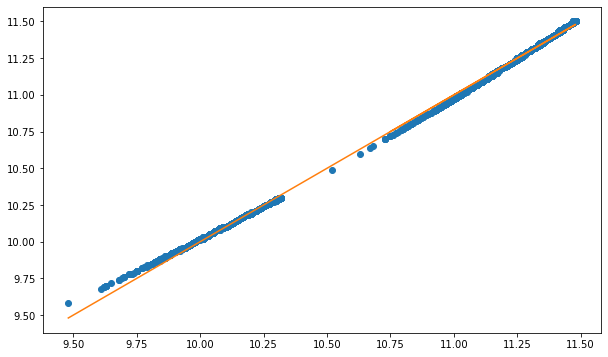

In [1336]:
y=df['Actual']
x=df['Predicted']
plt.plot(x, y, 'o')


m, b = np.polyfit(x, y, 1)



plt.plot(x, m*x + b)
